In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#path to the patient specific network, computed once with the GTEX reference network and once with the TCGA
tcga_breast_path = '/nfs/data2/dysregnet_gtex/results/tcga_breast_no_confounders_binary.fea'
tcga_lung_path = '/nfs/data2/dysregnet_gtex/results/tcga_lung_no_confounders_binary.fea'
gtex_breast_path = '/nfs/data2/dysregnet_gtex/results/gtex_breast_no_confounders_binary.fea'
gtex_lung_path = '/nfs/data2/dysregnet_gtex/results/gtex_lung_no_confounders_binary.fea'
tcga_breast_net = pd.read_feather(tcga_breast_path)
tcga_lung_net = pd.read_feather(tcga_lung_path)
gtex_breast_net = pd.read_feather(gtex_breast_path)
gtex_lung_net =pd.read_feather(gtex_lung_path)

In [5]:
#set tissue
tissue = 'lung'
if tissue == 'breast':
    tcga_net = tcga_breast_net
    gtex_net = gtex_breast_net
elif tissue == 'lung':
    tcga_net = tcga_lung_net
    gtex_net = gtex_lung_net


In [6]:
tcga_net = tcga_net.set_index(tcga_net.columns[0])
tcga_net

,"('PAX8', 'PAX8-AS1')","('PAX5', 'CR2')","('PAX5', 'FCRLA')","('SOX2', 'RP11-122M14.1')","('NR5A2', 'CCL14')","('SIX1', 'C20orf85')","('JUN', 'DUSP1')","('CCDC17', 'USP2-AS1')","('MYBL2', 'KIF4A')","('SIX1', 'PACRG')",...,"('ZNF268', 'SMEK2')","('ZNF664', 'RP11-563J2.3')","('ZNF281', 'ERN1')","('NFATC1', 'TRIM47')","('ZNF471', 'KIFAP3')","('ZNF587B', 'SMC6')","('ETV2', 'RP11-114F3.4')","('HMGN3', 'WDR34')","('RXRA', 'TRIOBP')","('TRPS1', 'TNFAIP8')"
patient id,,,,,,,,,,,,,,,,,,,,,
TCGA-55-7995-01,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
TCGA-69-7761-01,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-67-6216-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-44-6148-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-71-8520-01,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-69-7763-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-78-7150-01,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
TCGA-MP-A4TI-01,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#get the top 5 most disregulated edges
edge_counts = gtex_net.sum()
top_5_edges = edge_counts.nlargest(5)

# Print the results
for edge, count in top_5_edges.items():
    print(f"The edge '{edge}' appears {count} times.")

The edge '('SPI1', 'C1QA')' appears 1211.0 times.
The edge '('SPI1', 'AIF1')' appears 1211.0 times.
The edge '('SPI1', 'ITGB2')' appears 1211.0 times.
The edge '('SPI1', 'C1QC')' appears 1211.0 times.
The edge '('SPI1', 'ARRB2')' appears 1211.0 times.


In [27]:
#get the top 5 most disregulated edges
edge_counts = tcga_net.sum()
top_5_edges = edge_counts.nlargest(5)

# Print the results
for edge, count in top_5_edges.items():
    print(f"The edge '{edge}' appears {count} times.")

The edge '('HOXB7', 'CD300LG')' appears 978.0 times.
The edge '('ZFP92', 'CD300LG')' appears 975.0 times.
The edge '('PRRX2', 'MMP11')' appears 960.0 times.
The edge '('CEBPA', 'CD300LG')' appears 955.0 times.
The edge '('AEBP1', 'ADAM33')' appears 953.0 times.


In [7]:
common_columns = tcga_net.columns.intersection(gtex_net.columns)
common_rows = tcga_net.index.intersection(gtex_net.index)

In [8]:
print(f'shared columns between gtex and tcga breast networks: {len(common_columns)}')
print(f'shared rows between gtex and tcga breast networks {len(common_rows)}')

shared columns between gtex and tcga breast networks: 12409
shared rows between gtex and tcga breast networks 515


In [9]:
# only keep genes
tcga_commoon = tcga_net.loc[common_rows, common_columns]
gtex_common = gtex_net.loc[common_rows, common_columns]
print(tcga_commoon.shape)
print(gtex_common.shape)

(515, 12409)
(515, 12409)


In [10]:
#make sure rows and column are in the same order
# Ensure rows and columns are in the same order in both DataFrames
tcga_common = tcga_net.loc[common_rows, common_columns].sort_index().sort_index(axis=1)
gtex_common = gtex_net.loc[common_rows, common_columns].sort_index().sort_index(axis=1)


In [11]:

tcga_common = tcga_common.astype(int)
gtex_common = gtex_common.astype(int)
intersection = (tcga_common & gtex_common).sum(axis=1)
union = ((tcga_common + gtex_common) > 0).sum(axis=1)

# Store results in a new DataFrame
comparison_df = pd.DataFrame({
    'both_one': intersection,  # Count of 1s in both DataFrames
    'either_one': union,       # Count of 1s in at least one DataFrame
    'jaccard_similarity': intersection / union  # Optional: Jaccard index
})

# Print results
print(comparison_df)


                 both_one  either_one  jaccard_similarity
patient id                                               
TCGA-05-4244-01       627        4307            0.145577
TCGA-05-4250-01       607        4959            0.122404
TCGA-05-4382-01       448        5032            0.089030
TCGA-05-4384-01       213        4132            0.051549
TCGA-05-4389-01       750        5278            0.142099
...                   ...         ...                 ...
TCGA-NJ-A55O-01       329        4418            0.074468
TCGA-NJ-A55R-01       569        4712            0.120756
TCGA-NJ-A7XG-01       746        4922            0.151564
TCGA-O1-A52J-01       563        4673            0.120479
TCGA-S2-AA1A-01       349        3915            0.089144

[515 rows x 3 columns]


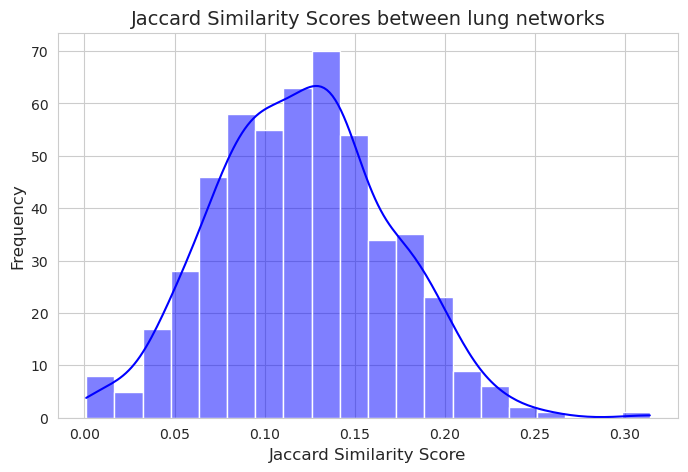

<Figure size 640x480 with 0 Axes>

In [14]:
#plot the distribution
# Set Seaborn style for better visuals
sns.set_style("whitegrid")

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(comparison_df['jaccard_similarity'], bins=20, kde=True, color="blue")

# Labels and title
plt.xlabel("Jaccard Similarity Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(f"Jaccard Similarity Scores between {tissue} networks", fontsize=14)

# Show plot
plt.show()
